<a href="https://colab.research.google.com/github/swarupe7/oibsip_taskno.3/blob/main/car_prediction18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
data=pd.read_csv('/content/car data.csv')

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.shape


(301, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(data.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [ ]:
print(data.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [ ]:
data=data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}})

In [ ]:
data=data.replace({'Seller_Type':{'Dealer':0,'Individual':1}})



In [ ]:
data=data.replace({'Transmission':{'Manual':0,"Automatic":1}})

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
r1=data.drop(['Car_Name','Selling_Price'],axis=1)
r2=data['Selling_Price']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(r1,r2,test_size=0.2,random_state=40)

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
train_data=lr.predict(x_train)
err=metrics.r2_score(y_train,train_data)
print('Score',err)

Score 0.8777782255367865


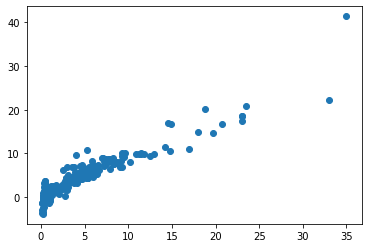

In [ ]:
plt.scatter(y_train,train_data)
plt.show()

In [ ]:
test_data=lr.predict(x_test)
err=metrics.r2_score(y_test,test_data)
print(err)

0.8591352720795978


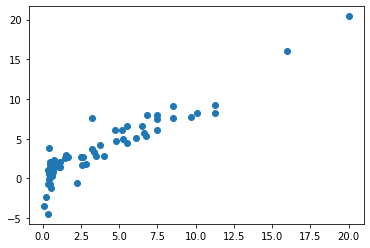

In [ ]:
plt.scatter(y_test,test_data)
plt.show()

Lasso regression

In [ ]:
la=Lasso()
la.fit(x_train,y_train)

Lasso()

In [ ]:
test_data=la.predict(x_train)
err=metrics.r2_score(y_train,test_data)

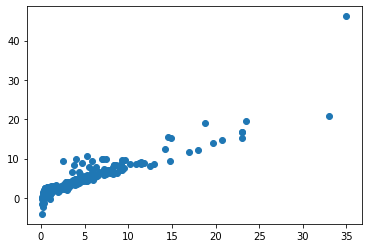

In [ ]:
plt.scatter(y_train,test_data)
plt.show()

0.8981928776884145


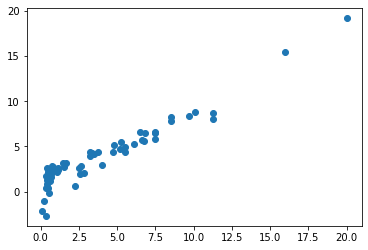

In [ ]:
test_data=la.predict(x_test)
err=metrics.r2_score(y_test,test_data)
print(err)
plt.scatter(y_test,test_data)
plt.show()
